# Arithmetic Operations in Image Processing


In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

## Image Addition for Noise Reduction

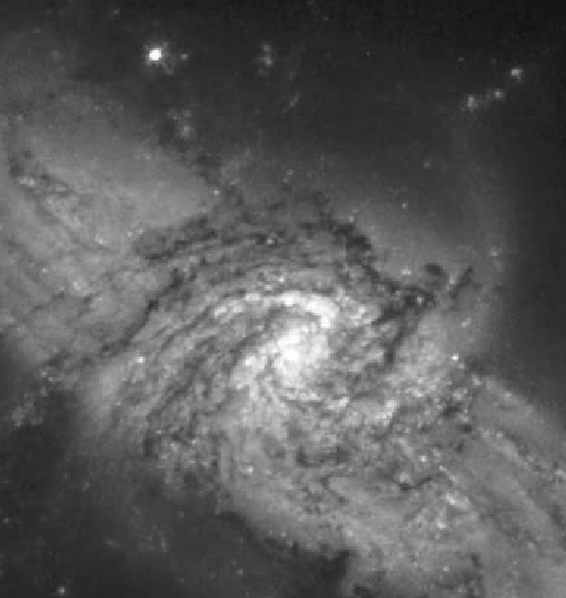

(598, 566, 3)


In [4]:
# loading the original image
galaxy_image = cv2.imread('galaxy_pair.tif')
cv2_imshow(galaxy_image)
print(galaxy_image.shape)

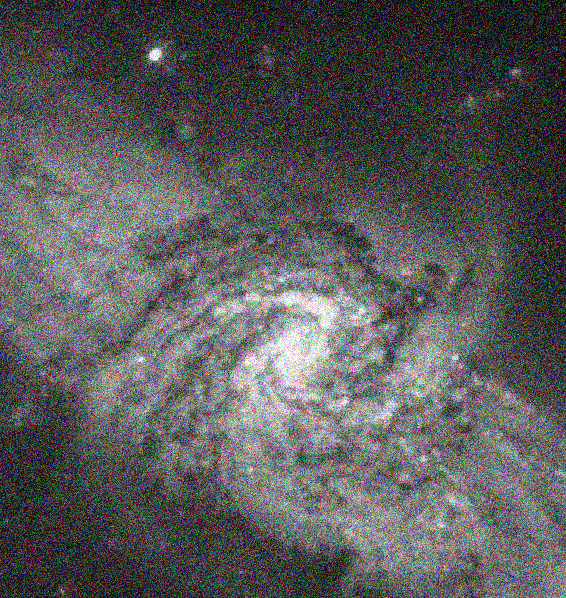

In [3]:
# generating gaussian noise
row, col, ch = galaxy_image.shape

mean = 0
var = 0.1
sigma = 400 * var

gauss_noise = np.random.normal(mean,sigma,(row,col,ch))
gauss_noise.reshape(row, col, ch)

# noisy image
noisy_galaxy_image = galaxy_image + gauss_noise

cv2_imshow(noisy_galaxy_image)

Averaging 5 images


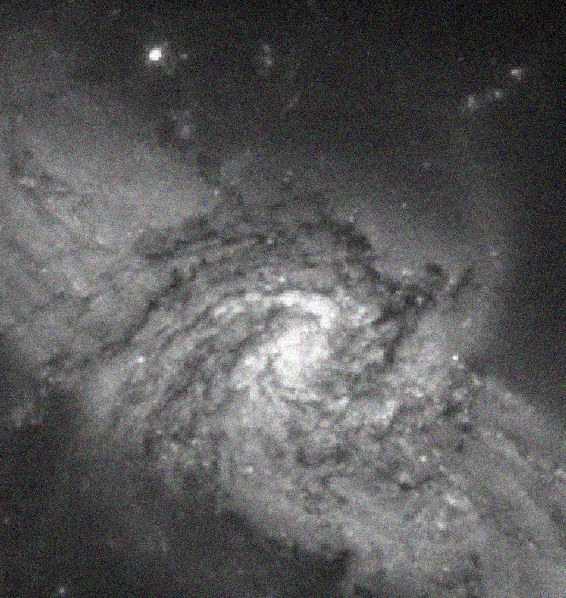

Averaging 10 images


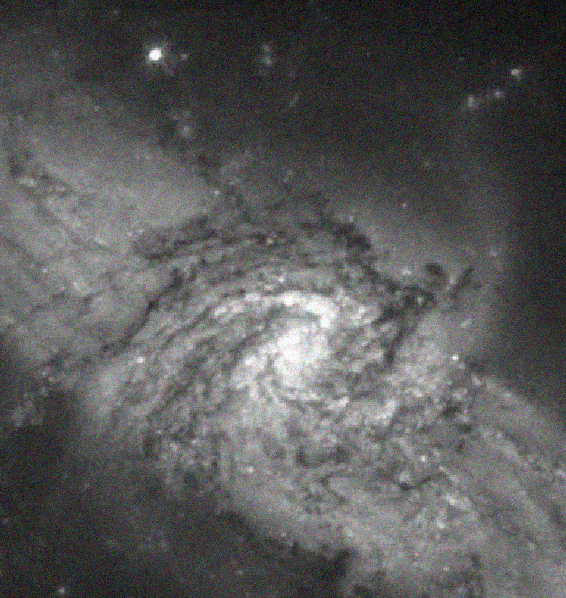

Averaging 20 images


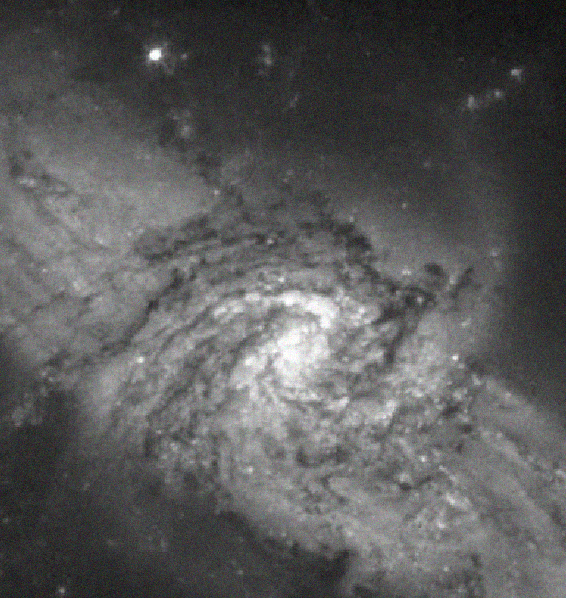

Averaging 50 images


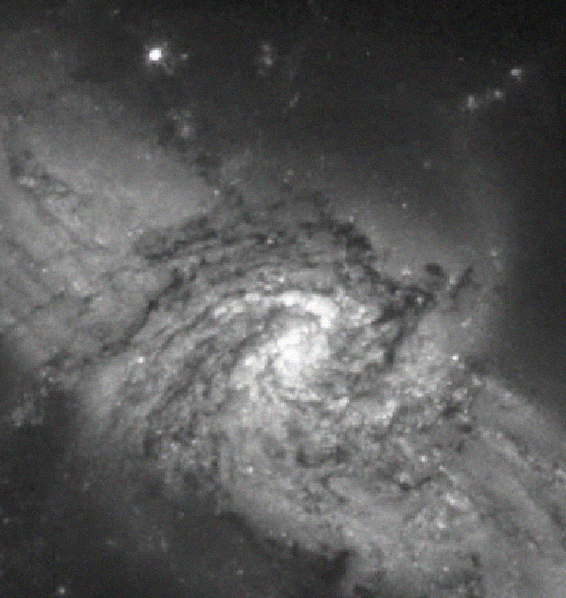

Averaging 100 images


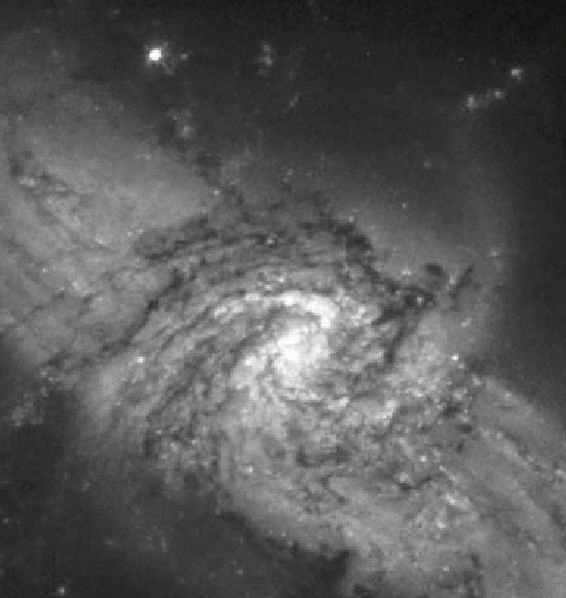

In [5]:
# averaging noisy images
n_images = [5, 10, 20, 50, 100]


for n in n_images:
  image_averages = []
  iter = n
  while iter > 0:
    gaussian_noise = np.random.normal(mean,sigma,(row,col,ch))
    gaussian_noise.reshape(row, col, ch)
    noisy_images = galaxy_image + gaussian_noise
    image_averages.append(noisy_images)

    iter -= 1
  denoised_image = np.zeros((row, col, ch))
  for avg in image_averages:
    denoised_image += avg
  denoised_image = denoised_image / n
  print(f"Averaging {n} images")
  cv2_imshow(denoised_image)

## Comparing Images using Subtraction

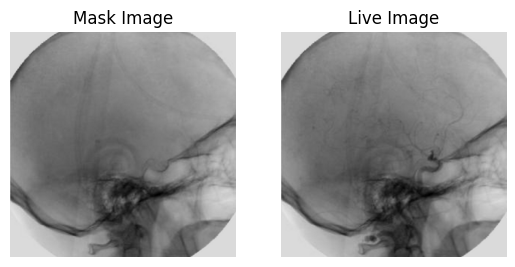

In [7]:
# loading the original image
mask_image = cv2.imread('mask_image.tif')
live_image = cv2.imread('live_image.tif')

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Mask Image")
plt.imshow(mask_image)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Live Image")
plt.imshow(live_image)

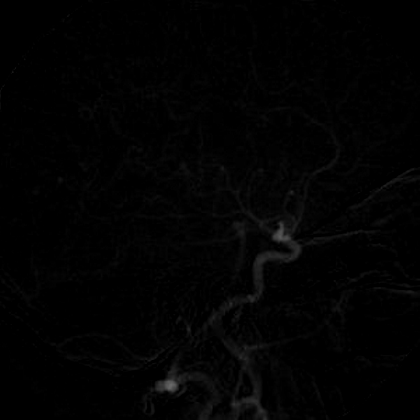

In [8]:
# subtracting the two images
result = cv2.subtract(mask_image, live_image)

cv2_imshow(result)

## Multiplying images for Masking

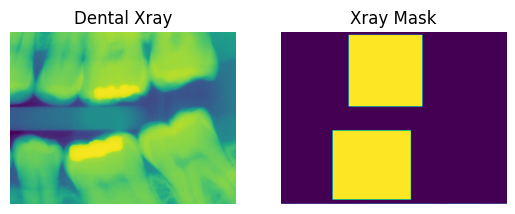

In [9]:
# loading images
dental_xray = Image.open('dental_xray.tif')
xray_mask = Image.open('xray_mask.tif')

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Dental Xray")
plt.imshow(dental_xray)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Xray Mask")
plt.imshow(xray_mask)

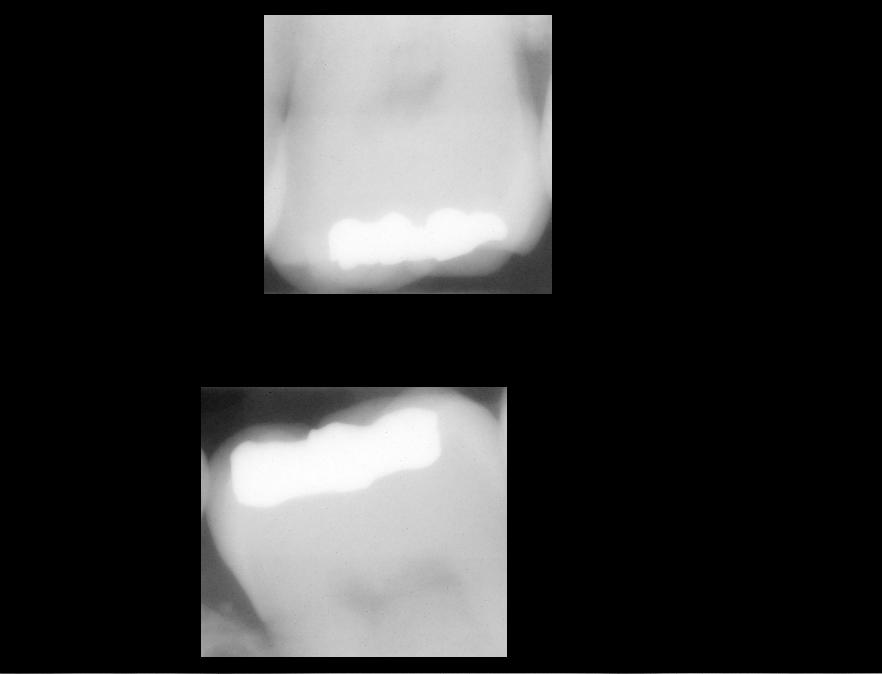

In [10]:
# multiplying the images
result = ImageChops.multiply(dental_xray, xray_mask)
result.show()